# Курсовая работа
## Автоматическая категоризация текстовых документов на основе их векторного представления

### Цель работы
Разработка системы автоматической классификации текстов новостных статей на основе векторных представлений.

### Задачи
1. Сбор новостных данных с сайта Lenta.ru.
2. Предобработка текстовых данных.
3. Преобразование текста в векторное представление.
4. Обучение и тестирование модели классификации.
5. Оценка эффективности и анализ результатов.

##Актуальность исследования
В условиях стремительного роста объемов цифровой информации, особенно в сфере новостных ресурсов, возрастает необходимость в автоматических методах обработки текстов. Ежедневно публикуются тысячи статей, обзоров и заметок, что делает ручную классификацию и структурирование контента практически невозможными. Поэтому задачи автоматической категоризации текстов становятся всё более востребованными.
Особую актуальность данное направление приобретает в контексте медиааналитики. Быстрое и точное определение тематики текстов позволяет эффективно фильтровать информацию, строить ленты новостей по интересам пользователя, а также анализировать информационные тренды.
С развитием технологий обработки естественного языка (Natural Language Processing) и появлением более совершенных алгоритмов машинного обучения появилась возможность построения высокоточных моделей категоризации на основе векторных представлений текстов. Это делает задачу, рассмотренную в данной курсовой работе, не только теоретически значимой, но и практически применимой в современных информационных системах.


##Введение
В современную эпоху информационного изобилия автоматическая обработка текстов приобретает всё большую актуальность. С ростом объёмов текстовой информации возрастает необходимость в интеллектуальных системах, способных быстро и точно определять тематику документов. Автоматическая категоризация текстов — одна из ключевых задач в области обработки естественного языка (NLP), находящая применение в новостной аналитике, системах фильтрации контента, интеллектуальных помощниках и многих других сферах.

Данная курсовая работа посвящена разработке системы автоматической классификации новостных статей на основе их векторного представления. В рамках проекта реализован полный цикл обработки данных: от сбора текстов с новостного ресурса до обучения модели машинного обучения и анализа полученных результатов.

##Пояснение к работе
В ходе работы были выполнены следующие этапы:

###Сбор данных:
Были собраны новостные статьи с сайта Lenta.ru с использованием парсинга HTML-страниц. Для этого применялись библиотеки requests, BeautifulSoup и др.

###Предобработка текста:
Очистка от HTML-тегов, токенизация, удаление стоп-слов, приведение к нижнему регистру и лемматизация. Это позволило стандартизировать тексты и подготовить их к векторизации.

###Векторизация текста:
Применены методы представления текста в числовом виде — с помощью модели XLM-RoBERTa-base (xlm-roberta-base), используя библиотеку Hugging Face Transformes, а также стандартный подход с помощью tf-idf.

###Классификация:
Для обучения модели использовались алгоритмы машинного обучения (например, LogisticRegression, CatbBoostClassifier, а также трансформер xlm-roberta-base и графовая нейронная сеть GNN). Обучение проводилось с разбивкой данных на обучающую и тестовую выборки.

###Оценка качества:
Проведена метрика качества классификаторов по таким показателям, как точность (accuracy), F-мера и матрица ошибок.



#Импорт и установка всех нужных бибилиотек

In [ ]:
!pip install datasets

In [ ]:
!pip install --upgrade transformers

In [ ]:
pip install -U "accelerate>=0.26.0"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install sentence_transformers

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade transformers

In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython import display

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from torch.optim import AdamW

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [ ]:
import numpy as np
from sklearn.neighbors import kneighbors_graph

In [ ]:
import re

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import string

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Сбор новостных данных с сайта Lenta.ru.

In [ ]:
class lentaRu_parser:
    def __init__(self):
        pass


    def _get_url(self, param_dict: dict) -> str:
        """
        Возвращает URL для запроса json таблицы со статьями

        url = 'https://lenta.ru/search/v2/process?'\
        + 'from=0&'\                       # Смещение
        + 'size=1000&'\                    # Кол-во статей
        + 'sort=2&'\                       # Сортировка по дате (2), по релевантности (1)
        + 'title_only=0&'\                 # Точная фраза в заголовке
        + 'domain=1&'\                     # ??
        + 'modified%2Cformat=yyyy-MM-dd&'\ # Формат даты
        + 'type=1&'\                       # Материалы. Все материалы (0). Новость (1)
        + 'bloc=4&'\                       # Рубрика. Экономика (4). Все рубрики (0)
        + 'modified%2Cfrom=2020-01-01&'\
        + 'modified%2Cto=2020-11-01&'\
        + 'query='                         # Поисковой запрос
        """
        hasType = int(param_dict['type']) != 0
        hasBloc = int(param_dict['bloc']) != 0

        url = 'https://lenta.ru/search/v2/process?'\
        + 'from={}&'.format(param_dict['from'])\
        + 'size={}&'.format(param_dict['size'])\
        + 'sort={}&'.format(param_dict['sort'])\
        + 'title_only={}&'.format(param_dict['title_only'])\
        + 'domain={}&'.format(param_dict['domain'])\
        + 'modified%2Cformat=yyyy-MM-dd&'\
        + 'type={}&'.format(param_dict['type']) * hasType\
        + 'bloc={}&'.format(param_dict['bloc']) * hasBloc\
        + 'modified%2Cfrom={}&'.format(param_dict['dateFrom'])\
        + 'modified%2Cto={}&'.format(param_dict['dateTo'])\
        + 'query={}'.format(param_dict['query'])

        return url


    def _get_search_table(self, param_dict: dict) -> pd.DataFrame:
        """
        Возвращает pd.DataFrame со списком статей
        """
        url = self._get_url(param_dict)
        r = rq.get(url)
        search_table = pd.DataFrame(r.json()['matches'])

        return search_table


    def get_articles(self,
                     param_dict,
                     time_step = 10,
                     save_every = 5,
                     save_excel = True) -> pd.DataFrame:
        param_copy = param_dict.copy()
        time_step = timedelta(days=time_step)
        dateFrom = datetime.strptime(param_copy['dateFrom'], '%Y-%m-%d')
        dateTo = datetime.strptime(param_copy['dateTo'], '%Y-%m-%d')
        if dateFrom > dateTo:
            raise ValueError('dateFrom should be less than dateTo')

        out = pd.DataFrame()
        save_counter = 0

        while dateFrom <= dateTo:
            param_copy['dateTo'] = (dateFrom + time_step).strftime('%Y-%m-%d')
            if dateFrom + time_step > dateTo:
                param_copy['dateTo'] = dateTo.strftime('%Y-%m-%d')
            print('Parsing articles from '\
                  + param_copy['dateFrom'] +  ' to ' + param_copy['dateTo'])
            out = pd.concat([out, self._get_search_table(param_copy)], axis=0, ignore_index=True)
            dateFrom += time_step + timedelta(days=1)
            param_copy['dateFrom'] = dateFrom.strftime('%Y-%m-%d')
            save_counter += 1
            if save_counter == save_every:
                display.clear_output(wait=True)
                out.to_excel("/tmp/checkpoint_table.xlsx")
                print('Checkpoint saved!')
                save_counter = 0

        if save_excel:
            out.to_excel("lenta_{}_{}.xlsx".format(
                param_dict['dateFrom'],
                param_dict['dateTo']))
        print('Finish')

        return out

<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
C:\Users\User\AppData\Local\Temp\ipykernel_16972\2389557303.py:7: SyntaxWarning: invalid escape sequence '\ '
  """


##Экономика

In [ ]:
use_parser = "LentaRu"

query = ''
offset = 0
size = 500
sort = "3"
title_only = "0"
domain = "1"
material = "0"
bloc = "4"
dateFrom = '2024-01-01'
dateTo = "2024-03-31"

if use_parser == "LentaRu":
    param_dict = {'query'     : query,
                  'from'      : str(offset),
                  'size'      : str(size),
                  'dateFrom'  : dateFrom,
                  'dateTo'    : dateTo,
                  'sort'      : sort,
                  'title_only': title_only,
                  'type'      : material,
                  'bloc'      : bloc,
                  'domain'    : domain}

print(use_parser, "- param_dict:", param_dict)

LentaRu - param_dict: {'query': '', 'from': '0', 'size': '500', 'dateFrom': '2024-01-01', 'dateTo': '2024-03-31', 'sort': '3', 'title_only': '0', 'type': '0', 'bloc': '4', 'domain': '1'}


In [ ]:
assert use_parser == "LentaRu"
parser = lentaRu_parser()
tbl = parser.get_articles(param_dict=param_dict,
                         time_step = 37,
                         save_every = 5,
                         save_excel = True)
print(len(tbl.index))
tbl.head()

Parsing articles from 2024-01-01 to 2024-02-07
Parsing articles from 2024-02-08 to 2024-03-16
Parsing articles from 2024-03-17 to 2024-03-31
Finish
1500


,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,1551045,https://lenta.ru/news/2024/01/01/v-rossii-uzhe...,В России ужесточили лимиты на выдачу кредитов,1704076440,1704077015,1,1,0,0,4,[7],https://icdn.lenta.ru/images/2024/01/01/05/202...,1704076440,Фото: Sergey Bulkin / News.ru / Global Look Pr...,В России ужесточили лимиты на выдачу кредитов,Фото: Sergey Bulkin / News.ru / Global ... лим...
1,1551094,https://lenta.ru/news/2024/01/01/kazahstan-res...,Казахстан решил повысить тариф на транзит нефт...,1704104940,1704108043,1,1,0,0,4,[9],https://icdn.lenta.ru/images/2024/01/01/13/202...,1704104940,Фото: Александр Манзюк / Коммерсантъ Варвара К...,Казахстан решил повысить тариф на транзит нефт...,Фото: Александр Манзюк / Коммерсантъ ... нефти...
2,1551156,https://lenta.ru/news/2024/01/01/putin-otsenil...,Путин оценил инфляцию в России,1704133358,1704133359,1,1,0,1,4,[7],https://icdn.lenta.ru/images/2024/01/01/21/202...,1704133358,Владимир Путин Фото: Kremlin Pool / Globallook...,Путин оценил инфляцию в России,Владимир Путин Фото: Kremlin Pool / ... (СВО) ...
3,1551194,https://lenta.ru/news/2024/01/02/crypto/,Биткоин подорожал до значений апреля 2022 года,1704159360,1704170769,1,1,0,0,4,[272],https://icdn.lenta.ru/images/2024/01/02/04/202...,1704159360,Фото: Unsplash Марина Совина Стоимость биткоин...,Биткоин подорожал до значений апреля 2022 года,Фото: Unsplash Марина Совина Стоимость ... дол...
4,1537708,https://lenta.ru/news/2023/12/06/future/,Предсказано будущее «Северных потоков» в 2024 ...,1704166200,1704168409,1,1,0,0,4,[8],https://icdn.lenta.ru/images/2023/12/06/17/202...,1704166200,Фото: Hannibal Hanschke / Reuters Кирилл Садов...,Предсказано будущее «Северных потоков» в 2024 ...,Фото: Hannibal Hanschke / Reuters Кирилл ... «...


In [ ]:
economy_tbl = tbl

In [ ]:
economy_tbl['url'][2]

'https://lenta.ru/news/2024/01/01/putin-otsenil-inflyatsiyu-v-rossii/'

In [ ]:
economy_tbl.to_csv('economy.csv', sep=',', index=False, encoding='utf-8')

## МИР

In [ ]:
use_parser = "LentaRu"

query = ''
offset = 0
size = 500
sort = "3"
title_only = "0"
domain = "1"
material = "0"
bloc = "2"
dateFrom = '2024-01-01'
dateTo = "2024-03-31"

if use_parser == "LentaRu":
    param_dict = {'query'     : query,
                  'from'      : str(offset),
                  'size'      : str(size),
                  'dateFrom'  : dateFrom,
                  'dateTo'    : dateTo,
                  'sort'      : sort,
                  'title_only': title_only,
                  'type'      : material,
                  'bloc'      : bloc,
                  'domain'    : domain}

print(use_parser, "- param_dict:", param_dict)

LentaRu - param_dict: {'query': '', 'from': '0', 'size': '500', 'dateFrom': '2024-01-01', 'dateTo': '2024-03-31', 'sort': '3', 'title_only': '0', 'type': '0', 'bloc': '2', 'domain': '1'}


In [ ]:
assert use_parser == "LentaRu"
parser = lentaRu_parser()
tbl_1 = parser.get_articles(param_dict=param_dict,
                         time_step = 37,
                         save_every = 5,
                         save_excel = True)
print(len(tbl_1.index))
tbl_1.head()

Parsing articles from 2024-01-01 to 2024-02-07
Parsing articles from 2024-02-08 to 2024-03-16
Parsing articles from 2024-03-17 to 2024-03-31
Finish
1500


,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,1551033,https://lenta.ru/news/2024/01/01/v-ssha-otseni...,В США оценили угрозы безопасности страны слова...,1704067757,1704067757,1,1,0,1,2,[1],https://icdn.lenta.ru/images/2024/01/01/03/202...,1704067757,Фото: Pixabay Марина Совина Экс-советник главы...,В США оценили угрозы безопасности страны слова...,Фото: Pixabay Марина Совина Экс-советник ... б...
1,1551037,https://lenta.ru/news/2024/01/01/nachalos-pred...,Началось председательство России в БРИКС,1704070863,1704070863,1,1,0,0,2,[1],https://icdn.lenta.ru/images/2024/01/01/04/202...,1704070863,Фото: Siphiwe Sibeko / Reuters Марина Совина С...,Началось председательство России в БРИКС,Фото: Siphiwe Sibeko / Reuters Марина ... пред...
2,1551041,https://lenta.ru/news/2024/01/01/v-evroparlame...,В Европарламенте назвали причину продолжения к...,1704073351,1704073351,1,1,0,0,2,[1],https://icdn.lenta.ru/images/2024/01/01/04/202...,1704073351,Фото: Yves Herman / Reuters Марина Совина Конф...,В Европарламенте назвали причину продолжения к...,Фото: Yves Herman / Reuters Марина ... пор из-...
3,1551043,https://lenta.ru/news/2024/01/01/kim-chen-yn-p...,Ким Чен Ын пригрозил уничтожить Вашингтон и Сеул,1704073920,1704092587,1,1,0,0,2,[1],https://icdn.lenta.ru/images/2024/01/01/04/202...,1704073920,Ким Чен Ын Фото: Sputnik / Reuters Марина Сови...,Ким Чен Ын пригрозил уничтожить Вашингтон и Сеул,Ким Чен Ын Фото: Sputnik / Reuters ... Вашингт...
4,1551058,https://lenta.ru/news/2024/01/01/rossiya-nacha...,Россия начала председательствовать в СНГ,1704085560,1704085674,1,1,0,0,2,[1],https://icdn.lenta.ru/images/2024/01/01/08/202...,1704085560,Фото: Сергей Карпухин / РИА Новости Юлия Миске...,Россия начала председательствовать в СНГ,Фото: Сергей Карпухин / РИА Новости Юлия ... Н...


In [ ]:
tbl_1['url'][100]

'https://lenta.ru/news/2024/01/03/ssha-tayno-dogovorilis-s-katarom-o-sohranenii-krupneyshey-aviabazy-v-regione/'

In [ ]:
tbl_1.to_csv('politics.csv', sep=',', index=False, encoding='utf-8')

##Бывший СССР

In [ ]:
use_parser = "LentaRu"

query = ''
offset = 0
size = 500
sort = "3"
title_only = "0"
domain = "1"
material = "0"
bloc = "3"
dateFrom = '2024-01-01'
dateTo = "2024-03-31"

if use_parser == "LentaRu":
    param_dict = {'query'     : query,
                  'from'      : str(offset),
                  'size'      : str(size),
                  'dateFrom'  : dateFrom,
                  'dateTo'    : dateTo,
                  'sort'      : sort,
                  'title_only': title_only,
                  'type'      : material,
                  'bloc'      : bloc,
                  'domain'    : domain}

print(use_parser, "- param_dict:", param_dict)

LentaRu - param_dict: {'query': '', 'from': '0', 'size': '500', 'dateFrom': '2024-01-01', 'dateTo': '2024-03-31', 'sort': '3', 'title_only': '0', 'type': '0', 'bloc': '3', 'domain': '1'}


In [ ]:
assert use_parser == "LentaRu"
parser = lentaRu_parser()
tbl_2 = parser.get_articles(param_dict=param_dict,
                         time_step = 37,
                         save_every = 5,
                         save_excel = True)
print(len(tbl_2.index))

Parsing articles from 2024-01-01 to 2024-02-07
Parsing articles from 2024-02-08 to 2024-03-16


C:\Users\User\AppData\Local\Temp\ipykernel_16972\2389557303.py:7: SyntaxWarning: invalid escape sequence '\ '
  """


KeyboardInterrupt: 

In [ ]:
tbl_2.head()

,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,1551031,https://lenta.ru/news/2024/01/01/chetvero-pogi...,"Четверо погибших, среди них военкор, 13 челове...",1704067200,1704105148,1,1,0,1,3,[55],https://icdn.lenta.ru/images/2024/01/01/02/202...,1704067200,Фото: Keystone Press Agency / Globallookpress....,"Четверо погибших, среди них военкор, 13 челове...",Фото: Keystone Press Agency / ... Нового года ...
1,1551035,https://lenta.ru/news/2024/01/01/zelenskiy-pos...,Зеленский поставил украинцев перед выбором в н...,1704069240,1704072219,1,1,0,0,3,[55],https://icdn.lenta.ru/images/2024/01/01/03/202...,1704069240,Владимир Зеленский Фото: NTB / Javad Parsa / R...,Зеленский поставил украинцев перед выбором в н...,Владимир Зеленский Фото: NTB / Javad ... испол...
2,1551040,https://lenta.ru/news/2024/01/01/v-zaporozhsko...,В Запорожской области назвали обстрел Белгород...,1704073405,1704074136,1,1,0,1,3,[55],https://icdn.lenta.ru/images/2024/01/01/04/202...,1704073405,Фото: Chumakov Sergey / Globallookpress.com Ма...,В Запорожской области назвали обстрел Белгород...,Фото: Chumakov Sergey / Globallookpress.... сц...
3,1551042,https://lenta.ru/news/2024/01/01/ukrainskiy-po...,Украинский полковник назвал причину грядущего ...,1704076008,1704076008,1,1,0,0,3,[55],https://icdn.lenta.ru/images/2024/01/01/04/202...,1704076008,Фото: Thomas Peter / Reuters Александра Синицы...,Украинский полковник назвал причину грядущего ...,"Фото: Thomas Peter / Reuters Александра ..., и..."
4,1551048,https://lenta.ru/news/2024/01/01/ukrainskie-po...,Украинские пограничники усилили контроль за вы...,1704079029,1704079029,1,1,0,0,3,[55],https://icdn.lenta.ru/images/2024/01/01/06/202...,1704079029,Фото: Lehtikuva / Reuters Александра Синицына ...,Украинские пограничники усилили контроль за вы...,Фото: Lehtikuva / Reuters Александра ... отсро...


In [ ]:
tbl_2['url'][1000]

'https://lenta.ru/news/2024/03/17/na-ukraine-raskryli-posledstviya-kriticheskoy-nehvatki-raket-dlya-sistem-pvo/'

In [ ]:
tbl_2.to_csv('SSSR.csv', sep=',', index=False, encoding='utf-8')

## Наука и техника

In [ ]:
use_parser = "LentaRu"

query = ''
offset = 0
size = 500
sort = "3"
title_only = "0"
domain = "1"
material = "0"
bloc = "5"
dateFrom = '2024-01-01'
dateTo = "2024-03-31"

if use_parser == "LentaRu":
    param_dict = {'query'     : query,
                  'from'      : str(offset),
                  'size'      : str(size),
                  'dateFrom'  : dateFrom,
                  'dateTo'    : dateTo,
                  'sort'      : sort,
                  'title_only': title_only,
                  'type'      : material,
                  'bloc'      : bloc,
                  'domain'    : domain}

print(use_parser, "- param_dict:", param_dict)

LentaRu - param_dict: {'query': '', 'from': '0', 'size': '500', 'dateFrom': '2024-01-01', 'dateTo': '2024-03-31', 'sort': '3', 'title_only': '0', 'type': '0', 'bloc': '5', 'domain': '1'}


In [ ]:
assert use_parser == "LentaRu"
parser = lentaRu_parser()
tbl_3 = parser.get_articles(param_dict=param_dict,
                         time_step = 37,
                         save_every = 5,
                         save_excel = True)
print(len(tbl_3.index))

Parsing articles from 2024-01-01 to 2024-02-07
Parsing articles from 2024-02-08 to 2024-03-16
Parsing articles from 2024-03-17 to 2024-03-31
Finish
1381


In [ ]:
tbl_3.head()

,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,1551050,https://lenta.ru/news/2024/01/01/rossiyskie-de...,"Российские десантники получили 2,5 тысячи един...",1704082259,1704082259,1,1,0,0,5,[13],https://icdn.lenta.ru/images/2024/01/01/06/202...,1704082259,Фото: Aleksander Polyakov / Global Look Press ...,"Российские десантники получили 2,5 тысячи един...","Фото: Aleksander Polyakov / Global Look ..., в..."
1,1551057,https://lenta.ru/news/2024/01/01/indiya-zapust...,Индия запустила в космос спутник для изучения ...,1704085140,1704085282,1,1,0,0,5,[17],https://icdn.lenta.ru/images/2024/01/01/08/202...,1704085140,Фото: Big G Media / Unsplash Марина Совина Инд...,Индия запустила в космос спутник для изучения ...,Фото: Big G Media / Unsplash Марина ... вывела...
2,1551062,https://lenta.ru/news/2024/01/01/krupneyshuyu-...,Крупнейшую с 2017 года вспышку на Солнце зарег...,1704088106,1704088106,1,1,0,0,5,"[16, 17]",https://icdn.lenta.ru/images/2024/01/01/08/202...,1704088106,Фото: PxHere Александра Синицына В новогоднюю ...,Крупнейшую с 2017 года вспышку на Солнце зарег...,Фото: PxHere Александра Синицына В ... с 2017 ...
3,1551207,https://lenta.ru/news/2024/01/02/dalnyaya-avia...,Дальняя авиация России получит модернизированн...,1704168060,1704168060,1,1,0,1,5,[13],https://icdn.lenta.ru/images/2024/01/02/07/202...,1704168060,Фото: Pavel Kashaev / Globallookpress.com Мари...,Дальняя авиация России получит модернизированн...,Фото: Pavel Kashaev / Globallookpress.... сооб...
4,1551206,https://lenta.ru/news/2024/01/02/razvedka/,Стало известно о применении в зоне СВО новейши...,1704168339,1704168339,1,1,0,0,5,[13],https://icdn.lenta.ru/images/2024/01/02/07/202...,1704168339,Фото: РИА Новости Марина Совина Вооруженные си...,Стало известно о применении в зоне СВО новейши...,Фото: РИА Новости Марина Совина ... «Ястреб-АВ...


In [ ]:
tbl_3['url'][100]

'https://lenta.ru/news/2024/01/11/putin-otsenil-effektivnost-rossiyskih-bpla-v-hode-svo/'

In [ ]:
tbl_3.to_csv('science_and_technology.csv', sep=',', index=False, encoding='utf-8')

##Культура

In [ ]:
use_parser = "LentaRu"

query = ''
offset = 0
size = 500
sort = "3"
title_only = "0"
domain = "1"
material = "0"
bloc = "6"
dateFrom = '2024-01-01'
dateTo = "2024-03-31"

if use_parser == "LentaRu":
    param_dict = {'query'     : query,
                  'from'      : str(offset),
                  'size'      : str(size),
                  'dateFrom'  : dateFrom,
                  'dateTo'    : dateTo,
                  'sort'      : sort,
                  'title_only': title_only,
                  'type'      : material,
                  'bloc'      : bloc,
                  'domain'    : domain}

print(use_parser, "- param_dict:", param_dict)

LentaRu - param_dict: {'query': '', 'from': '0', 'size': '500', 'dateFrom': '2024-01-01', 'dateTo': '2024-03-31', 'sort': '3', 'title_only': '0', 'type': '0', 'bloc': '6', 'domain': '1'}


In [ ]:
assert use_parser == "LentaRu"
parser = lentaRu_parser()
tbl_4 = parser.get_articles(param_dict=param_dict,
                         time_step = 37,
                         save_every = 5,
                         save_excel = True)
print(len(tbl_4.index))

Parsing articles from 2024-01-01 to 2024-02-07
Parsing articles from 2024-02-08 to 2024-03-16
Parsing articles from 2024-03-17 to 2024-03-31
Finish
1319


In [ ]:
tbl_4.head()

,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,1551028,https://lenta.ru/news/2024/01/01/v-rossii-sozd...,В России создадут систему для сохранения культ...,1704069420,1704069611,1,1,0,0,6,[23],https://icdn.lenta.ru/images/2024/01/01/03/202...,1704069420,Фото: Кристина Кормилицына / РИА Новости Юлия ...,В России создадут систему для сохранения культ...,Фото: Кристина Кормилицына / РИА Новости ... и...
1,1551054,https://lenta.ru/news/2024/01/01/chetyrehletny...,Четырехлетняя племянница звезды «Постучись в м...,1704084180,1704084395,1,1,0,0,6,[269],https://icdn.lenta.ru/images/2024/01/01/07/202...,1704084180,Кадр т/с «Постучись в мою дверь» Марина Совина...,Четырехлетняя племянница звезды «Постучись в м...,Кадр т/с «Постучись в мою дверь» Марина ... дв...
2,1551063,https://lenta.ru/news/2024/01/01/zhora-kryzhov...,Жора Крыжовников намекнул на второй сезон «Сло...,1704086460,1704097312,1,1,0,0,6,[269],https://icdn.lenta.ru/images/2024/01/01/08/202...,1704086460,Кадр: Сериал «Слово пацана» Марина Совина Режи...,Жора Крыжовников намекнул на второй сезон «Сло...,"Кадр: Сериал «Слово пацана» Марина ..., что шо..."
3,1551061,https://lenta.ru/news/2024/01/01/buzova-prokom...,Бузова прокомментировала слухи о сближении с Д...,1704086535,1704086535,1,1,0,0,6,[19],https://icdn.lenta.ru/images/2024/01/01/08/202...,1704086535,Ольга Бузова Фото: «Комсомольская правда» / Gl...,Бузова прокомментировала слухи о сближении с Д...,Ольга Бузова Фото: «Комсомольская правда»... Д...
4,1548294,https://lenta.ru/articles/2024/01/02/20-samyh-...,20 самых ожидаемых фильмов 2024 года:,1704142920,1704363762,2,1,0,1,6,[18],https://icdn.lenta.ru/images/2023/12/26/18/202...,1704142920,Кадр: сериал: «Фуриоса: Хроники Безумного Макс...,"«Дюна», «Джокер», «Дедпул» и клонированный Роб...","Кадр: сериал: «Фуриоса: Хроники ..., байопик Э..."


In [ ]:
tbl_4['url'][1000]

'https://lenta.ru/news/2024/03/17/pevitsa-uspenskaya-poluchila-rossiyskoe-grazhdanstvo/'

In [ ]:
tbl_4.to_csv('culture.csv', sep=',', index=False, encoding='utf-8')

##Интернет и СМИ

In [ ]:
use_parser = "LentaRu"

query = ''
offset = 0
size = 500
sort = "3"
title_only = "0"
domain = "1"
material = "0"
bloc = "7"
dateFrom = '2024-01-01'
dateTo = "2024-03-31"

if use_parser == "LentaRu":
    param_dict = {'query'     : query,
                  'from'      : str(offset),
                  'size'      : str(size),
                  'dateFrom'  : dateFrom,
                  'dateTo'    : dateTo,
                  'sort'      : sort,
                  'title_only': title_only,
                  'type'      : material,
                  'bloc'      : bloc,
                  'domain'    : domain}

print(use_parser, "- param_dict:", param_dict)

LentaRu - param_dict: {'query': '', 'from': '0', 'size': '500', 'dateFrom': '2024-01-01', 'dateTo': '2024-03-31', 'sort': '3', 'title_only': '0', 'type': '0', 'bloc': '7', 'domain': '1'}


In [ ]:
assert use_parser == "LentaRu"
parser = lentaRu_parser()
tbl_5 = parser.get_articles(param_dict=param_dict,
                         time_step = 37,
                         save_every = 5,
                         save_excel = True)
print(len(tbl_5.index))

Parsing articles from 2024-01-01 to 2024-02-07
Parsing articles from 2024-02-08 to 2024-03-16
Parsing articles from 2024-03-17 to 2024-03-31
Finish
1271


In [ ]:
tbl_5.head()

,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,1551036,https://lenta.ru/news/2024/01/01/zelenskomu-pr...,Зеленскому предсказали хаос из-за «ретроградно...,1704069660,1704069789,1,1,0,1,7,[196],https://icdn.lenta.ru/images/2024/01/01/03/202...,1704069660,Владимир Зеленский Фото: President Of Ukraine ...,Зеленскому предсказали хаос из-за «ретроградно...,Владимир Зеленский Фото: President Of ... из-з...
1,1551046,https://lenta.ru/news/2024/01/01/na-zapade-zay...,На Западе заявили о следующем ударе по России,1704078060,1704097837,1,1,0,0,7,[27],https://icdn.lenta.ru/images/2024/01/01/06/202...,1704078060,Фото: Yves Herman / Reuters Марина Совина Росс...,На Западе заявили о следующем ударе по России,Фото: Yves Herman / Reuters Марина ... санкцио...
2,1551110,https://lenta.ru/news/2024/01/01/sud-otkazalsy...,Суд отказался блокировать YouTube-канал Ивлеевой,1704111180,1704111882,1,1,0,0,7,[25],https://icdn.lenta.ru/images/2024/01/01/15/202...,1704111180,Фото: Сергей Савостьянов / ТАСС Варвара Кошечк...,Суд отказался блокировать YouTube-канал Ивлеевой,Фото: Сергей Савостьянов / ТАСС Варвара ... ви...
3,1551169,https://lenta.ru/news/2024/01/02/zapretnoe-slo...,«Запретное слово в правительственных кругах» Н...,1704146902,1704146902,1,1,0,1,7,[27],https://icdn.lenta.ru/images/2024/01/01/23/202...,1704146902,Владимир Зеленский и Валерий Залужный Фото: Uk...,«Запретное слово в правительственных кругах» Н...,Владимир Зеленский и Валерий Залужный ... приз...
4,1551184,https://lenta.ru/news/2024/01/02/evil/,Маск назвал 2024 год безумнее предыдущих,1704149220,1704176061,1,1,0,0,7,[31],https://icdn.lenta.ru/images/2024/01/02/01/202...,1704149220,Илон Маск Фото: Gonzalo Fuentes / Reuters Мари...,Маск назвал 2024 год безумнее предыдущих,Илон Маск Фото: Gonzalo Fuentes / ... 2024 год...


In [ ]:
tbl_5['url'][10]

'https://lenta.ru/news/2024/01/03/ukraine-predrekli-zhestkoe-predatelstvo-ot-zapada/'

In [ ]:
tbl_5.to_csv('Internet.csv', sep=',', index=False, encoding='utf-8')

##Спорт

In [ ]:
use_parser = "LentaRu"

query = ''
offset = 0
size = 500
sort = "3"
title_only = "0"
domain = "1"
material = "0"
bloc = "8"
dateFrom = '2024-01-01'
dateTo = "2024-03-31"

if use_parser == "LentaRu":
    param_dict = {'query'     : query,
                  'from'      : str(offset),
                  'size'      : str(size),
                  'dateFrom'  : dateFrom,
                  'dateTo'    : dateTo,
                  'sort'      : sort,
                  'title_only': title_only,
                  'type'      : material,
                  'bloc'      : bloc,
                  'domain'    : domain}

print(use_parser, "- param_dict:", param_dict)

LentaRu - param_dict: {'query': '', 'from': '0', 'size': '500', 'dateFrom': '2024-01-01', 'dateTo': '2024-03-31', 'sort': '3', 'title_only': '0', 'type': '0', 'bloc': '8', 'domain': '1'}


In [ ]:
assert use_parser == "LentaRu"
parser = lentaRu_parser()
tbl_6 = parser.get_articles(param_dict=param_dict,
                         time_step = 37,
                         save_every = 5,
                         save_excel = True)
print(len(tbl_6.index))

Parsing articles from 2024-01-01 to 2024-02-07
Parsing articles from 2024-02-08 to 2024-03-16
Parsing articles from 2024-03-17 to 2024-03-31
Finish
1406


In [ ]:
tbl_6.head()

,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,1550967,https://lenta.ru/news/2024/01/01/fitnes-trener...,Фитнес-тренер предложила план возвращения к за...,1704087191,1704087191,1,1,0,1,8,[387],https://icdn.lenta.ru/images/2023/12/31/18/202...,1704087191,Фото: Unsplash Андрей Стрельцов Фитнес-тренер ...,Фитнес-тренер предложила план возвращения к за...,Фото: Unsplash Андрей Стрельцов Фитнес-... воз...
1,1551072,https://lenta.ru/news/2024/01/01/kucherov-perv...,Кучеров первым в сезоне НХЛ достиг отметки в 6...,1704094920,1704101063,1,1,0,0,8,[183],https://icdn.lenta.ru/images/2024/01/01/10/202...,1704094920,Фото: Dirk Shadd / Globallookpress.com Илья Ко...,Кучеров первым в сезоне НХЛ достиг отметки в 6...,Фото: Dirk Shadd / Globallookpress.com ... Нац...
2,1551079,https://lenta.ru/news/2024/01/01/mezhdunarodny...,Международный союз велосипедистов присвоил ней...,1704098520,1704099848,1,1,0,0,8,[273],https://icdn.lenta.ru/images/2024/01/01/11/202...,1704098520,Фото: Ian MacNicol / Getty Images Илья Костин ...,Международный союз велосипедистов присвоил ней...,Фото: Ian MacNicol / Getty Images Илья ... ста...
3,1551087,https://lenta.ru/news/2024/01/01/futbolist-man...,Футболист «Манчестер Сити» рассказал об ограбл...,1704104100,1704104674,1,1,0,0,8,[32],https://icdn.lenta.ru/images/2024/01/01/12/202...,1704104100,Фото: Amr Abdallah Dalsh / Reuters Илья Костин...,Футболист «Манчестер Сити» рассказал об ограбл...,Фото: Amr Abdallah Dalsh / Reuters Илья ... ра...
4,1551096,https://lenta.ru/news/2024/01/01/zagitova-ob-y...,Загитова объяснила использование слова «безызб...,1704107460,1704121373,1,1,0,0,8,[37],https://icdn.lenta.ru/images/2024/01/01/13/202...,1704107460,Фото: Егор Алеев / ТАСС Илья Костин Российская...,Загитова объяснила использование слова «безызб...,Фото: Егор Алеев / ТАСС Илья Костин ... исполь...


In [ ]:
tbl_6['url'][10]

'https://lenta.ru/sport/2024/01/01/tennis-emil-ruusuvuori-finlyandiya-karen-hachanov-rossiya/'

In [ ]:
tbl_6.to_csv('Sport.csv', sep=',', index=False, encoding='utf-8')

##Из жизни

In [ ]:
use_parser = "LentaRu"

query = ''
offset = 0
size = 500
sort = "3"
title_only = "0"
domain = "1"
material = "0"
bloc = "9"
dateFrom = '2024-01-01'
dateTo = "2024-03-31"

if use_parser == "LentaRu":
    param_dict = {'query'     : query,
                  'from'      : str(offset),
                  'size'      : str(size),
                  'dateFrom'  : dateFrom,
                  'dateTo'    : dateTo,
                  'sort'      : sort,
                  'title_only': title_only,
                  'type'      : material,
                  'bloc'      : bloc,
                  'domain'    : domain}

print(use_parser, "- param_dict:", param_dict)

LentaRu - param_dict: {'query': '', 'from': '0', 'size': '500', 'dateFrom': '2024-01-01', 'dateTo': '2024-03-31', 'sort': '3', 'title_only': '0', 'type': '0', 'bloc': '9', 'domain': '1'}


In [ ]:
assert use_parser == "LentaRu"
parser = lentaRu_parser()
tbl_7 = parser.get_articles(param_dict=param_dict,
                         time_step = 37,
                         save_every = 5,
                         save_excel = True)
print(len(tbl_7.index))

Parsing articles from 2024-01-01 to 2024-02-07
Parsing articles from 2024-02-08 to 2024-03-16
Parsing articles from 2024-03-17 to 2024-03-31
Finish
1223


In [ ]:
tbl_7.head()

,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,1551128,https://lenta.ru/news/2024/01/01/rossiyanin-vy...,Россиянин выиграл миллиард рублей в лотерею,1704121200,1704121540,1,1,0,0,9,[277],https://icdn.lenta.ru/images/2024/01/01/17/202...,1704121200,Фото: Jochen Tack / Globallookpress.com Варвар...,Россиянин выиграл миллиард рублей в лотерею,Фото: Jochen Tack / Globallookpress.com ... но...
1,1551486,https://lenta.ru/news/2024/01/03/moskvichi-vyb...,Москвичи выбрали имя для детеныша панды,1704273660,1704274447,1,1,0,1,9,[43],https://icdn.lenta.ru/images/2024/01/03/12/202...,1704273660,Кадр: Telegram-канал «Светлана Акулова» Влада ...,Москвичи выбрали имя для детеныша панды,Кадр: Telegram-канал «Светлана Акулова» ... ле...
2,1542781,https://lenta.ru/articles/2024/01/04/wine/,«Эти ублюдки украли самое ценное»,1704315660,1704889516,2,1,0,1,9,[44],https://icdn.lenta.ru/images/2023/12/18/12/202...,1704315660,Фото: Bondart Photography / Shutterstock / Fot...,Дерзкие грабители похитили вина времен Наполео...,Фото: Bondart Photography / Shutterstock ... в...
3,1551636,https://lenta.ru/news/2024/01/04/v-ssha-podros...,В США подросток первым в истории прошел игру «...,1704333330,1704333330,1,1,0,0,9,"[42, 277]",https://icdn.lenta.ru/images/2024/01/04/04/202...,1704333330,Фото: Lander Denys / Unsplash Марина Совина По...,В США подросток первым в истории прошел игру «...,Фото: Lander Denys / Unsplash Марина ... ориги...
4,1542882,https://lenta.ru/articles/2024/01/04/pozdravle...,Поздравления с Рождеством в стихах и прозе.,1704364995,1704364995,2,1,0,1,9,[42],https://icdn.lenta.ru/images/2023/12/19/15/202...,1704364995,Фото: HabilePhotography / Shutterstock / Fotod...,"Как поздравить родных, друзей и коллег в 2024 ...",Фото: HabilePhotography / Shutterstock / ... и...


In [ ]:
tbl_7.to_csv('Life.csv', sep=',', index=False, encoding='utf-8')

#Предобработка датасета

In [ ]:
tbl_all = pd.concat([economy_tbl, tbl_1, tbl_2, tbl_3, tbl_4, tbl_5, tbl_7, tbl_6], ignore_index=True)

In [ ]:
tbl_all

,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,1551045,https://lenta.ru/news/2024/01/01/v-rossii-uzhe...,В России ужесточили лимиты на выдачу кредитов,1704076440,1704077015,1,1,0,0,4,[7],https://icdn.lenta.ru/images/2024/01/01/05/202...,1704076440,Фото: Sergey Bulkin / News.ru / Global Look Pr...,В России ужесточили лимиты на выдачу кредитов,Фото: Sergey Bulkin / News.ru / Global ... лим...
1,1551094,https://lenta.ru/news/2024/01/01/kazahstan-res...,Казахстан решил повысить тариф на транзит нефт...,1704104940,1704108043,1,1,0,0,4,[9],https://icdn.lenta.ru/images/2024/01/01/13/202...,1704104940,Фото: Александр Манзюк / Коммерсантъ Варвара К...,Казахстан решил повысить тариф на транзит нефт...,Фото: Александр Манзюк / Коммерсантъ ... нефти...
2,1551156,https://lenta.ru/news/2024/01/01/putin-otsenil...,Путин оценил инфляцию в России,1704133358,1704133359,1,1,0,1,4,[7],https://icdn.lenta.ru/images/2024/01/01/21/202...,1704133358,Владимир Путин Фото: Kremlin Pool / Globallook...,Путин оценил инфляцию в России,Владимир Путин Фото: Kremlin Pool / ... (СВО) ...
3,1551194,https://lenta.ru/news/2024/01/02/crypto/,Биткоин подорожал до значений апреля 2022 года,1704159360,1704170769,1,1,0,0,4,[272],https://icdn.lenta.ru/images/2024/01/02/04/202...,1704159360,Фото: Unsplash Марина Совина Стоимость биткоин...,Биткоин подорожал до значений апреля 2022 года,Фото: Unsplash Марина Совина Стоимость ... дол...
4,1537708,https://lenta.ru/news/2023/12/06/future/,Предсказано будущее «Северных потоков» в 2024 ...,1704166200,1704168409,1,1,0,0,4,[8],https://icdn.lenta.ru/images/2023/12/06/17/202...,1704166200,Фото: Hannibal Hanschke / Reuters Кирилл Садов...,Предсказано будущее «Северных потоков» в 2024 ...,Фото: Hannibal Hanschke / Reuters Кирилл ... «...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,1598280,https://lenta.ru/news/2024/03/31/chempion-mira...,Чемпион мира объяснил рост результативности Ов...,1711903500,1711907130,1,1,0,0,8,[183],https://icdn.lenta.ru/images/2024/03/31/19/202...,1711903500,Александр Овечкин Фото: Geoff Burke / USA TODA...,Чемпион мира объяснил рост результативности Ов...,Александр Овечкин Фото: Geoff Burke / ... Наци...
11096,1598285,https://lenta.ru/news/2024/03/31/manchester-si...,«Манчестер Сити» сыграл вничью с «Арсеналом» в...,1711906500,1711907529,1,1,0,0,8,[32],https://icdn.lenta.ru/images/2024/03/31/20/202...,1711906500,Фото: Jason Cairnduff / Action Images / Reute...,«Манчестер Сити» сыграл вничью с «Арсеналом» в...,Фото: Jason Cairnduff / Action Images / ...-г...
11097,1598286,https://lenta.ru/news/2024/03/31/krasnodar-syg...,«Краснодар» сыграл вничью с «Локомотивом» в ма...,1711910640,1711911255,1,1,0,0,8,[32],https://icdn.lenta.ru/images/2024/03/31/20/202...,1711910640,Фото: Maksim Konstantinov / Globallookpress.co...,«Краснодар» сыграл вничью с «Локомотивом» в ма...,Фото: Maksim Konstantinov / ...-го тура Россий...
11098,1598296,https://lenta.ru/news/2024/03/31/golevoy-pas-z...,Голевой пас Захаряна помог «Реалу Сосьедад» по...,1711912440,1711913120,1,1,0,0,8,[32],https://icdn.lenta.ru/images/2024/03/31/22/202...,1711912440,Фото: Evgenia Novozhenina / Reuters Алексей Гу...,Голевой пас Захаряна помог «Реалу Сосьедад» по...,Фото: Evgenia Novozhenina / Reuters ... испанс...


In [ ]:
tbl_all.drop(['rightcol', 'image_url', 'pubdate', 'snippet', 'modified', 'title', 'lastmodtime', 'type', 'domain', 'status', 'part', 'url', 'docid'], axis = 1)

,bloc,tags,text
0,4,[7],Фото: Sergey Bulkin / News.ru / Global Look Pr...
1,4,[9],Фото: Александр Манзюк / Коммерсантъ Варвара К...
2,4,[7],Владимир Путин Фото: Kremlin Pool / Globallook...
3,4,[272],Фото: Unsplash Марина Совина Стоимость биткоин...
4,4,[8],Фото: Hannibal Hanschke / Reuters Кирилл Садов...
...,...,...,...
11095,8,[183],Александр Овечкин Фото: Geoff Burke / USA TODA...
11096,8,[32],Фото: Jason Cairnduff / Action Images / Reute...
11097,8,[32],Фото: Maksim Konstantinov / Globallookpress.co...
11098,8,[32],Фото: Evgenia Novozhenina / Reuters Алексей Гу...


In [ ]:
tbl_all.to_csv('dataset_coursework.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Финашка/курсовая/dataset_coursework.csv")

In [ ]:
df.columns = ['label', 'text']

In [ ]:
df

,label,text
0,4,Фото: Sergey Bulkin / News.ru / Global Look Pr...
1,4,Фото: Александр Манзюк / Коммерсантъ Варвара К...
2,4,Владимир Путин Фото: Kremlin Pool / Globallook...
3,4,Фото: Unsplash Марина Совина Стоимость биткоин...
4,4,Фото: Hannibal Hanschke / Reuters Кирилл Садов...
...,...,...
11095,8,Александр Овечкин Фото: Geoff Burke / USA TODA...
11096,8,Фото: Jason Cairnduff / Action Images / Reute...
11097,8,Фото: Maksim Konstantinov / Globallookpress.co...
11098,8,Фото: Evgenia Novozhenina / Reuters Алексей Гу...


In [ ]:
df = df.dropna(subset=["text"])
df["text"] = df["text"].astype(str)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('russian') and word not in string.punctuation]
    return ' '.join(tokens)

df['text'] = df['text'].apply(preprocess_text)

<ipython-input-29-a4aeab8dbd94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].astype(str)


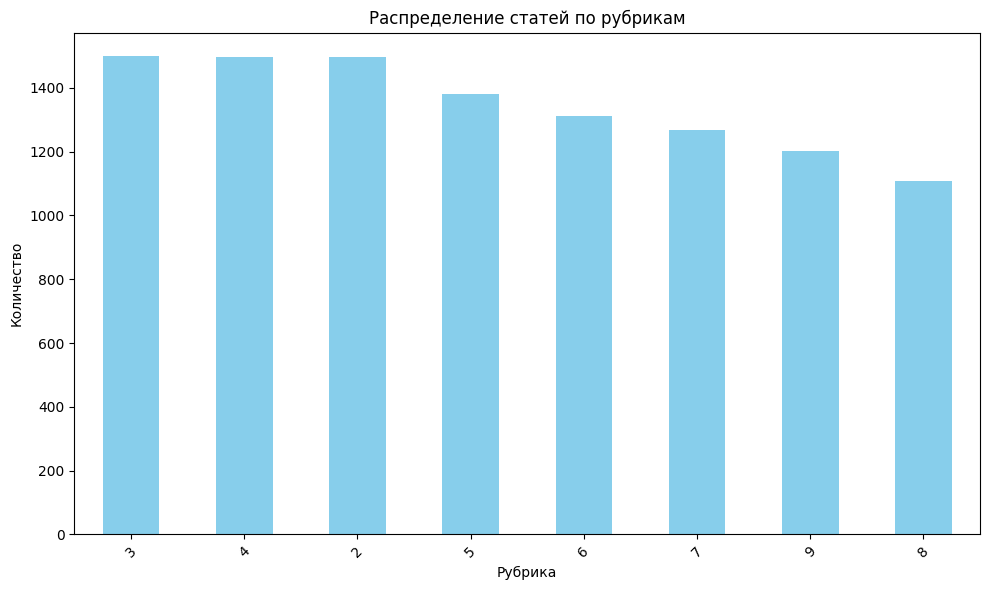

In [ ]:
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение статей по рубрикам')
plt.xlabel('Рубрика')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Получение эмбеддингов

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_xlm = AutoModel.from_pretrained(model_name).to(device)
model_xlm.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

XLMRobertaModel(
  (embeddings): XLMRobertaEmbeddings(
    (word_embeddings): Embedding(250002, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): XLMRobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x XLMRobertaLayer(
        (attention): XLMRobertaAttention(
          (self): XLMRobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): XLMRobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine

In [ ]:
def get_cls_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model_xlm(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

embeddings_xlm = []
for text in tqdm(df["text"].tolist(), desc="Получение эмбеддингов"):
    try:
        emb = get_cls_embedding(text)
        embeddings_xlm.append(emb)
    except:
        embeddings_xlm.append(np.zeros(768))


In [ ]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

#Построение моделей классификации

##Логистическая регрессия

In [ ]:
X_train, X_test, y_train_tfidf, y_test_tfidf = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Exception ignored in: <function _xla_gc_callback at 0x7cb5b4be4400>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


In [ ]:
clf_log = LogisticRegression(max_iter=1000)
clf_log.fit(X_train_tfidf, y_train_tfidf)
y_pred_log_tfidf = clf_log.predict(X_test_tfidf)

In [ ]:
names_class = {2 : 'МИР', 3 : 'Бывший СССР', 4:'Экономика', 5:'Наука и техника', 6: 'Культура', 7 : 'Интернет и СМИ', 8: 'Спорт', 9 : 'Из жизни'}

In [ ]:
print(classification_report(y_test_tfidf, y_pred_log_tfidf, target_names=list(names_class.values())))

                 precision    recall  f1-score   support

            МИР       0.80      0.90      0.85       290
    Бывший СССР       0.88      0.89      0.88       333
      Экономика       0.94      0.96      0.95       294
Наука и техника       0.93      0.94      0.94       281
       Культура       0.95      0.96      0.95       255
 Интернет и СМИ       0.94      0.77      0.85       244
          Спорт       1.00      0.98      0.99       219
       Из жизни       0.93      0.94      0.94       237

       accuracy                           0.92      2153
      macro avg       0.92      0.92      0.92      2153
   weighted avg       0.92      0.92      0.92      2153



In [ ]:
X = np.array(embeddings_xlm)
y = df["label"].values

X_train_xlm, X_test_xlm, y_train_xlm, y_test_xlm = train_test_split(X, y, test_size=0.2, random_state=42)
clf_log = LogisticRegression(max_iter=1000)
clf_log.fit(X_train_xlm, y_train_xlm)
y_pred_log_xlm = clf_log.predict(X_test_xlm)

In [ ]:
print(classification_report(y_test_xlm, y_pred_log_xlm, target_names=list(names_class.values())))

                 precision    recall  f1-score   support

            МИР       0.67      0.78      0.72       290
    Бывший СССР       0.80      0.76      0.78       333
      Экономика       0.89      0.87      0.88       294
Наука и техника       0.88      0.92      0.90       281
       Культура       0.85      0.87      0.86       255
 Интернет и СМИ       0.73      0.54      0.62       244
          Спорт       0.96      0.95      0.95       219
       Из жизни       0.82      0.87      0.84       237

       accuracy                           0.82      2153
      macro avg       0.82      0.82      0.82      2153
   weighted avg       0.82      0.82      0.82      2153



## MLPClassifier

In [ ]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300, random_state=42)
clf_mlp.fit(X_train_tfidf, y_train_tfidf)
y_pred_mlp_tfidf = clf_mlp.predict(X_test_tfidf)

print(classification_report(y_test_tfidf, y_pred_mlp_tfidf, target_names=list(names_class.values())))

                 precision    recall  f1-score   support

            МИР       0.83      0.87      0.85       290
    Бывший СССР       0.90      0.90      0.90       333
      Экономика       0.95      0.96      0.95       294
Наука и техника       0.93      0.95      0.94       281
       Культура       0.96      0.96      0.96       255
 Интернет и СМИ       0.93      0.82      0.87       244
          Спорт       1.00      0.99      0.99       219
       Из жизни       0.92      0.95      0.94       237

       accuracy                           0.92      2153
      macro avg       0.93      0.92      0.92      2153
   weighted avg       0.92      0.92      0.92      2153



In [ ]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300, random_state=42)
clf_mlp.fit(X_train_xlm, y_train_xlm)
y_pred_mlp_xlm = clf_mlp.predict(X_test_xlm)

print(classification_report(y_test_xlm, y_pred_mlp_xlm, target_names=list(names_class.values())))


                 precision    recall  f1-score   support

            МИР       0.78      0.64      0.70       290
    Бывший СССР       0.76      0.86      0.81       333
      Экономика       0.90      0.89      0.90       294
Наука и техника       0.90      0.89      0.90       281
       Культура       0.97      0.73      0.84       255
 Интернет и СМИ       0.75      0.66      0.70       244
          Спорт       0.96      0.95      0.95       219
       Из жизни       0.65      0.96      0.78       237

       accuracy                           0.82      2153
      macro avg       0.84      0.82      0.82      2153
   weighted avg       0.83      0.82      0.82      2153



## CatBoost

In [ ]:
model_catboost = CatBoostClassifier(
    iterations=10000,
    learning_rate=0.01,
    depth=6,
    eval_metric='Accuracy',
    task_type='GPU',
    devices='0:1',
    random_seed=42,
    early_stopping_rounds=200,
    verbose=1000,
    l2_leaf_reg=8,
    random_strength=0.3
)

In [ ]:
train_pool_tfidf = Pool(X_train_tfidf, y_train_tfidf)
valid_pool_tfidf = Pool(X_test_tfidf, y_test_tfidf)

In [ ]:
model_catboost.fit(
    train_pool_tfidf,
    eval_set=valid_pool_tfidf,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4166570	test: 0.4180214	best: 0.4180214 (0)	total: 342ms	remaining: 57m 2s
1000:	learn: 0.8629341	test: 0.8397585	best: 0.8397585 (999)	total: 2m 12s	remaining: 19m 55s
2000:	learn: 0.8924381	test: 0.8676266	best: 0.8680910 (1924)	total: 4m 29s	remaining: 17m 55s
3000:	learn: 0.9076548	test: 0.8773804	best: 0.8778449 (2922)	total: 7m 46s	remaining: 18m 6s
bestTest = 0.8783093358
bestIteration = 3015
Shrink model to first 3016 iterations.


In [ ]:
y_pred_cat_tfidf = model_catboost.predict(X_test_tfidf)

print(classification_report(y_test_tfidf, y_pred_cat_tfidf, target_names=list(names_class.values())))

                 precision    recall  f1-score   support

            МИР       0.75      0.84      0.79       290
    Бывший СССР       0.83      0.85      0.84       333
      Экономика       0.89      0.93      0.91       294
Наука и техника       0.93      0.87      0.90       281
       Культура       0.89      0.95      0.92       255
 Интернет и СМИ       0.87      0.73      0.80       244
          Спорт       1.00      0.96      0.98       219
       Из жизни       0.95      0.92      0.93       237

       accuracy                           0.88      2153
      macro avg       0.89      0.88      0.88      2153
   weighted avg       0.88      0.88      0.88      2153



In [ ]:
train_pool_xlm = Pool(X_train_xlm, y_train_xlm)
valid_pool_xlm = Pool(X_test_xlm, y_test_xlm)

In [ ]:
model_catboost.fit(
    train_pool_xlm,
    eval_set=valid_pool_xlm,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5215472	test: 0.5099861	best: 0.5099861 (0)	total: 82.4ms	remaining: 13m 43s
1000:	learn: 0.8671158	test: 0.7956340	best: 0.7960985 (962)	total: 42.8s	remaining: 6m 24s
bestTest = 0.810496981
bestIteration = 1429
Shrink model to first 1430 iterations.


In [ ]:
y_pred_cat_xlm = model_catboost.predict(X_test_xlm)

print(classification_report(y_test_xlm, y_pred_cat_xlm, target_names=list(names_class.values())))

                 precision    recall  f1-score   support

            МИР       0.66      0.77      0.71       290
    Бывший СССР       0.80      0.75      0.77       333
      Экономика       0.86      0.87      0.86       294
Наука и техника       0.88      0.91      0.90       281
       Культура       0.84      0.86      0.85       255
 Интернет и СМИ       0.73      0.55      0.62       244
          Спорт       0.95      0.94      0.94       219
       Из жизни       0.80      0.86      0.83       237

       accuracy                           0.81      2153
      macro avg       0.81      0.81      0.81      2153
   weighted avg       0.81      0.81      0.81      2153



# Трансформер xlm-roberta-base

In [ ]:
num_labels = df["label"].nunique()
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["text"].tolist(), df["label"].tolist(), test_size=0.2, random_state=42
)

model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

class NewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=256)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_texts, train_labels)
test_dataset = NewsDataset(test_texts, test_labels)

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
model.to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=2e-5)


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

loss_values = []
epoch_avg_losses = []
best_loss = float('inf')
no_improve_steps = 0
early_stop_patience = 300

model.train()

stop_training = False

for epoch in range(1, 100):
    if stop_training:
        break

    loop = tqdm(train_loader, desc=f"Эпоха {epoch}")
    epoch_losses = []

    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_val = loss.item()
        epoch_losses.append(loss_val)
        loss_values.append(loss_val)
        loop.set_postfix(loss=loss_val)


        if loss_val < best_loss - 1e-4:
            best_loss = loss_val
            no_improve_steps = 0
        else:
            no_improve_steps += 1

        if no_improve_steps >= early_stop_patience:
            print(f"\n📉 Ранняя остановка на эпохе {epoch} — без улучшения {early_stop_patience} батчей.")
            stop_training = True
            break


    epoch_avg_loss = np.mean(epoch_losses)
    epoch_avg_losses.append(epoch_avg_loss)


Эпоха 4:  55%|█████▌    | 299/539 [03:51<03:05,  1.29it/s, loss=0.394]


📉 Ранняя остановка на эпохе 4 — без улучшения 300 батчей.


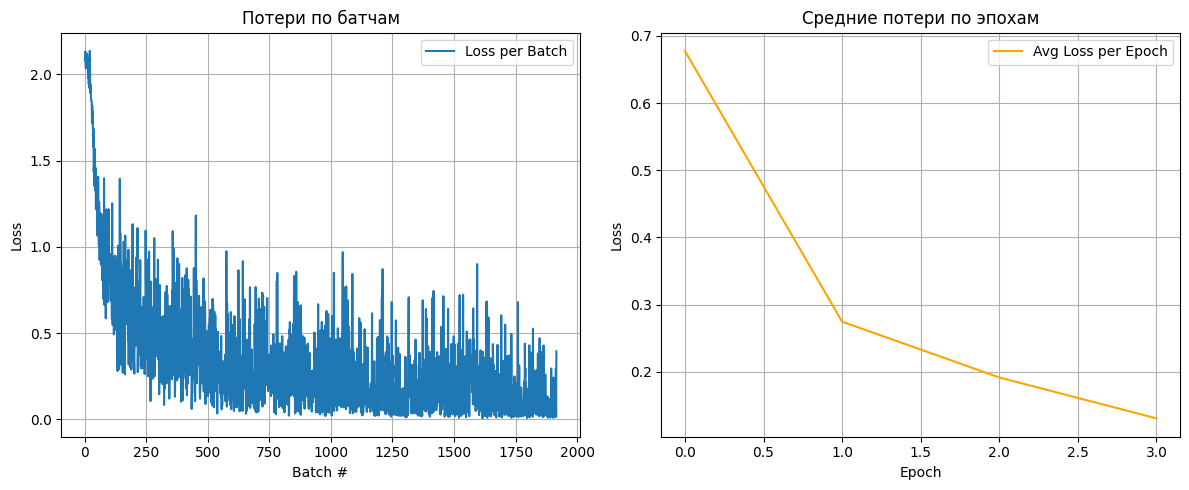

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Loss per Batch')
plt.xlabel("Batch #")
plt.ylabel("Loss")
plt.title("Потери по батчам")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_avg_losses, label='Avg Loss per Epoch', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Средние потери по эпохам")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = batch["labels"].cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels)

In [ ]:
print(classification_report(all_labels, all_preds, target_names=list(names_class.values())))

                 precision    recall  f1-score   support

            МИР       0.93      0.81      0.86       290
    Бывший СССР       0.93      0.92      0.92       333
      Экономика       0.92      0.98      0.95       294
Наука и техника       0.93      0.95      0.94       281
       Культура       0.96      0.95      0.96       255
 Интернет и СМИ       0.84      0.89      0.86       244
          Спорт       0.99      0.97      0.98       219
       Из жизни       0.93      0.96      0.95       237

       accuracy                           0.93      2153
      macro avg       0.93      0.93      0.93      2153
   weighted avg       0.93      0.93      0.93      2153



# Графовая нейронная сеть

In [ ]:
similarity_matrix = cosine_similarity(embeddings)
threshold = 0.7
edge_index = kneighbors_graph(embeddings, n_neighbors=5, mode='connectivity').nonzero()
edge_index = torch.tensor(np.vstack(edge_index), dtype=torch.long)

In [ ]:
data = Data(
    x=torch.tensor(embeddings, dtype=torch.float),
    edge_index=torch.tensor(edge_index, dtype=torch.long),
    y=torch.tensor(df['label'], dtype=torch.long)
)

<ipython-input-76-55617105e389>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  x=torch.tensor(embeddings, dtype=torch.float),
<ipython-input-76-55617105e389>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index=torch.tensor(edge_index, dtype=torch.long),


In [ ]:
train_mask = torch.zeros(len(df["text"]), dtype=torch.bool)
test_mask = torch.zeros(len(df["text"]), dtype=torch.bool)
train_idx, test_idx = train_test_split(np.arange(len(df["text"])), test_size=0.2)
train_mask[train_idx] = True
test_mask[test_idx] = True

data.train_mask = train_mask
data.test_mask = test_mask

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super().__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [ ]:
model = GCN(num_features=768, hidden_channels=64, num_classes=len(set(df['label'])))

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim=1)
        acc = accuracy_score(data.y[data.test_mask], pred[data.test_mask])
        f1 = f1_score(data.y[data.test_mask], pred[data.test_mask], average='macro')
    return acc, f1

In [ ]:
best_f1 = 0
patience = 300
counter = 0

train_losses = []
test_accuracies = []
test_f1s = []

for epoch in range(1, 10000):
    loss = train()
    train_losses.append(loss)

    if epoch % 50 == 0:
        acc, f1 = test()
        test_accuracies.append(acc)
        test_f1s.append(f1)
        print(f'Epoch: {epoch}, Loss: {loss:.4f}, Test Acc: {acc:.4f}, Test F1: {f1:.4f}')

    if f1 > best_f1:
        best_f1 = f1
        counter = 0
        best_model_state = model.state_dict()
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping on epoch {epoch}. Best F1: {best_f1:.4f}")
            break

model.load_state_dict(best_model_state)

Epoch: 50, Loss: 1.3440, Test Acc: 0.6103, Test F1: 0.5954
Epoch: 100, Loss: 1.2396, Test Acc: 0.6419, Test F1: 0.6234
Epoch: 150, Loss: 1.1832, Test Acc: 0.6665, Test F1: 0.6543
Epoch: 200, Loss: 1.1465, Test Acc: 0.6962, Test F1: 0.6852
Epoch: 250, Loss: 1.0978, Test Acc: 0.7232, Test F1: 0.7149
Epoch: 300, Loss: 1.0930, Test Acc: 0.7288, Test F1: 0.7218
Epoch: 350, Loss: 1.0398, Test Acc: 0.7334, Test F1: 0.7293
Epoch: 400, Loss: 1.0314, Test Acc: 0.7459, Test F1: 0.7438
Epoch: 450, Loss: 1.0335, Test Acc: 0.7566, Test F1: 0.7538
Epoch: 500, Loss: 1.0122, Test Acc: 0.7594, Test F1: 0.7548
Epoch: 550, Loss: 1.0016, Test Acc: 0.7752, Test F1: 0.7730
Epoch: 600, Loss: 0.9918, Test Acc: 0.7771, Test F1: 0.7746
Epoch: 650, Loss: 0.9839, Test Acc: 0.7743, Test F1: 0.7734
Epoch: 700, Loss: 0.9689, Test Acc: 0.7836, Test F1: 0.7848
Epoch: 750, Loss: 0.9566, Test Acc: 0.7859, Test F1: 0.7872
Epoch: 800, Loss: 0.9651, Test Acc: 0.7831, Test F1: 0.7839
Epoch: 850, Loss: 0.9458, Test Acc: 0.785

<All keys matched successfully>

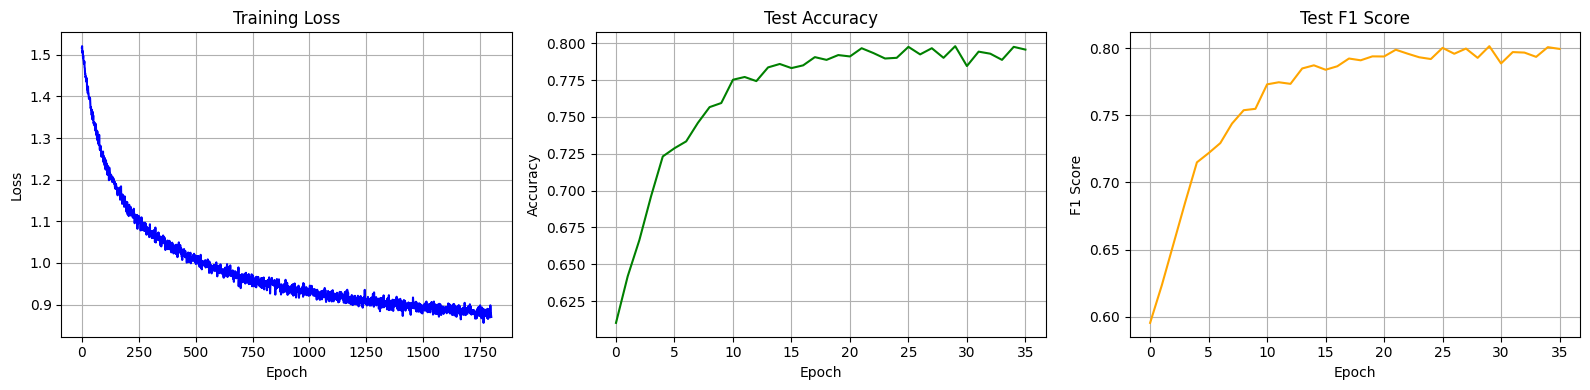

In [ ]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot([i for i in range(1800)], train_losses, label='Train Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot([i for i in range(36)], test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot([i for i in range(36)], test_f1s, label='Test F1 Macro', color='orange')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Test F1 Score')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
model.eval()
all_preds_graph, all_labels = [], []

with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim=1)

In [ ]:

print(classification_report(data.y[data.test_mask], pred[data.test_mask], target_names=list(names_class.values())))

                 precision    recall  f1-score   support

            МИР       0.65      0.66      0.66       289
    Бывший СССР       0.73      0.72      0.72       309
      Экономика       0.86      0.87      0.87       310
Наука и техника       0.87      0.88      0.87       261
       Культура       0.87      0.85      0.86       254
 Интернет и СМИ       0.68      0.64      0.66       259
          Спорт       0.95      0.93      0.94       228
       Из жизни       0.78      0.86      0.81       243

       accuracy                           0.80      2153
      macro avg       0.80      0.80      0.80      2153
   weighted avg       0.80      0.80      0.80      2153



#Сравнение моделей

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import display

In [ ]:
def compare_models(model_results):
    comparison = []

    for result in model_results:
        y_true = result['y_true']
        y_pred = result['y_pred']
        name = result['name']

        accuracy = accuracy_score(y_true, y_pred)
        f1_macro = f1_score(y_true, y_pred, average='macro')
        f1_micro = f1_score(y_true, y_pred, average='micro')
        f1_weighted = f1_score(y_true, y_pred, average='weighted')

        comparison.append({
            'Model': name,
            'Accuracy': round(accuracy, 4),
            'F1 Macro': round(f1_macro, 4),
            'F1 Micro': round(f1_micro, 4),
            'F1 Weighted': round(f1_weighted, 4)
        })

    df_comp = pd.DataFrame(comparison)
    display(df_comp)

    df_plot = df_comp.set_index('Model')[['Accuracy', 'F1 Macro', 'F1 Micro', 'F1 Weighted']]
    df_plot.plot(kind='bar', figsize=(10, 6))
    plt.title('Сравнение моделей по метрикам')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()


,Model,Accuracy,F1 Macro,F1 Micro,F1 Weighted
0,LogReg_xlm,0.8184,0.8187,0.8184,0.8162
1,LogReg_tfiidf,0.9155,0.9179,0.9155,0.9153
2,MLP_xlm,0.8207,0.8214,0.8207,0.8200
3,MLP_tfidf,0.9224,0.9248,0.9224,0.9223
4,CatBoost_xlm,0.8105,0.8109,0.8105,0.8084
5,CatBoost_xlm,0.8783,0.8826,0.8783,0.8786


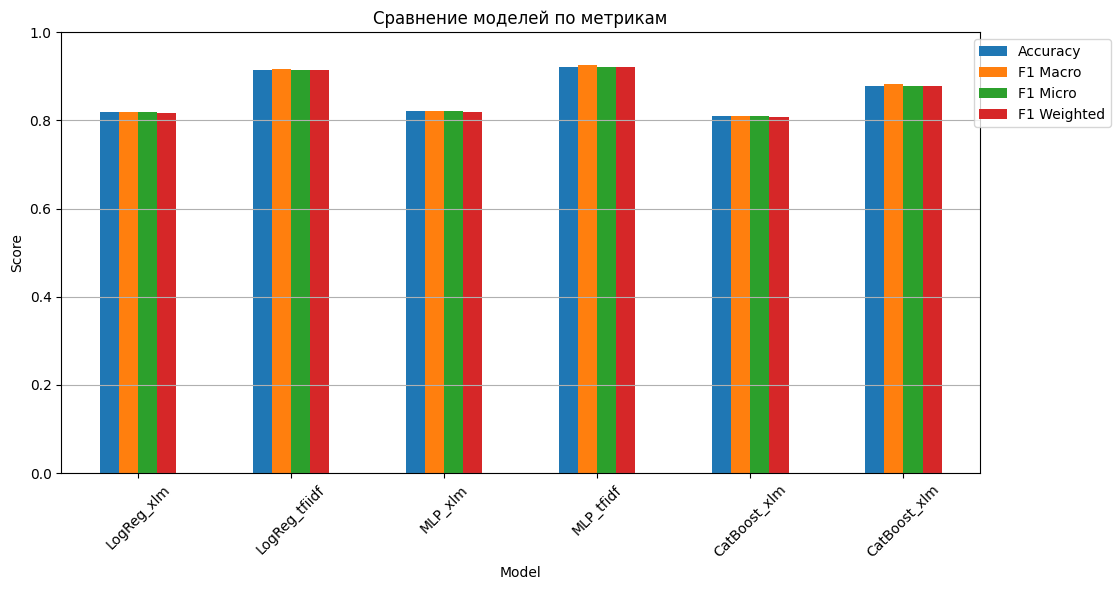

In [ ]:
results = [
    {'name': 'LogReg_xlm', 'y_true': y_test_xlm, 'y_pred': y_pred_log_xlm},
    {'name': 'LogReg_tfiidf', 'y_true': y_test_tfidf, 'y_pred': y_pred_log_tfidf},
    {'name': 'MLP_xlm', 'y_true': y_test_xlm, 'y_pred': y_pred_mlp_xlm},
    {'name': 'MLP_tfidf', 'y_true': y_test_tfidf, 'y_pred': y_pred_mlp_tfidf},
    {'name': 'CatBoost_xlm', 'y_true': y_test_xlm, 'y_pred': y_pred_cat_xlm},
    {'name': 'CatBoost_xlm', 'y_true': y_test_tfidf, 'y_pred': y_pred_cat_tfidf}
]

compare_models(results)

,Model,Accuracy,F1 Macro,F1 Micro,F1 Weighted
0,LogReg,0.8189,0.8192,0.8189,0.8167
1,MLP,0.8203,0.8210,0.8203,0.8195
2,CatBoost,0.8105,0.8109,0.8105,0.8084
3,XLM,0.9275,0.9286,0.9275,0.9272
4,GNN,0.7956,0.7994,0.7956,0.7951


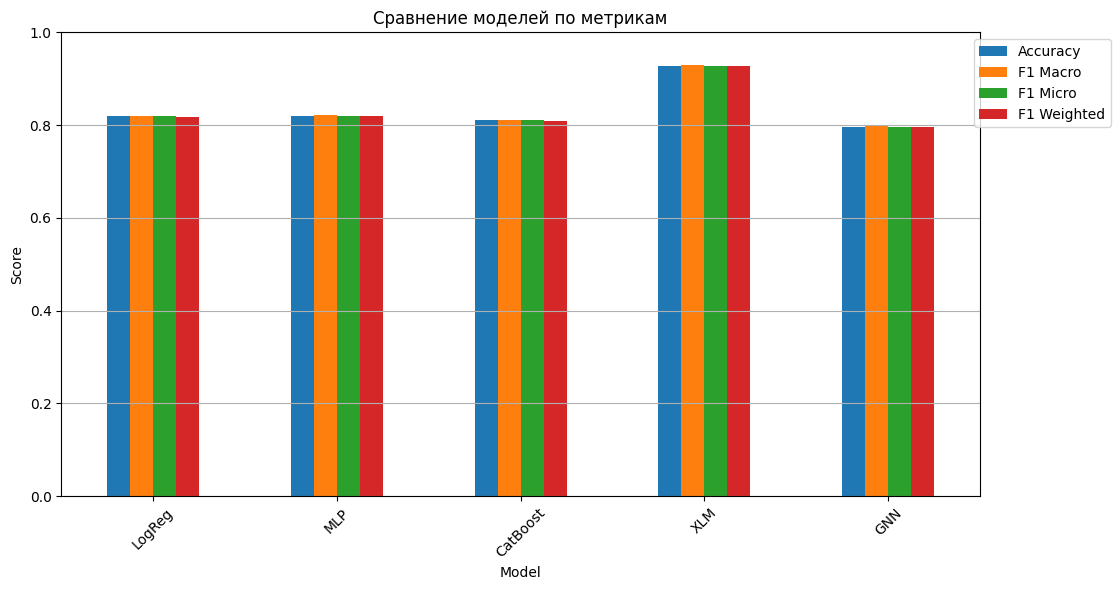

In [ ]:
results = [
    {'name': 'LogReg', 'y_true': y_test_xlm, 'y_pred': y_pred_log_xlm},
    {'name': 'MLP', 'y_true': y_test_xlm, 'y_pred': y_pred_mlp_xlm},
    {'name': 'CatBoost', 'y_true': y_test_xlm, 'y_pred': y_pred_cat_xlm},
    {'name': 'XLM', 'y_true': all_labels, 'y_pred': all_preds},
    {'name': 'GNN', 'y_true': data.y[data.test_mask], 'y_pred': pred[data.test_mask]}

]

compare_models(results)

# Выводы

В результате выполнения курсовой работы была успешно реализована система автоматической категоризации новостных статей. Ключевые достижения проекта:

Получена и обработана коллекция реальных новостных данных.

Проведена полная текстовая предобработка, что позволило повысить эффективность моделей.

Построена и обучена модель классификации, показавшая удовлетворительные результаты на тестовой выборке.

Сравнительный анализ различных моделей позволил выбрать оптимальный подход к задаче категоризации, а именно лучше всех себя показал трансформер xlm-roberta-base и классический подход tfidf + MLPClassifier.

Данная система может быть применена как основа для дальнейших разработок в области автоматизации обработки текстовой информации, а также адаптирована под различные тематические домены.

# Список литературы

1. Йылдырым С., Асгари-Ченаглу М. Осваиваем архитектуру Transformer: Разработка современных моделей с помощью передовых методов обработки естественного языка. — М.: Диалектика, 2022.

2. Parsing News from RBC & Lenta.ru / Kaggle [Электронный ресурс]. — Режим доступа: https://www.kaggle.com/code/hardtype/parsing-news-from-rbc-lenta-ru (дата обращения: 20.04.2025).

3. Извлечение признаков из текстовых данных с использованием TF-IDF / Хабр [Электронный ресурс]. - Режим доступа: https://habr.com/ru/companies/otus/articles/755772/ (дата обращения: 20.04.2025)

